The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import sys
sys.path += ['../../../easyXRD']

In [3]:
import easyxrd



Checking required packages:

---xarray package with version 2024.3.0 is available and imported 
---ipympl package with version 0.9.4 is available and imported 
---pyFAI package with version 2024.5.0 is available and imported 
---scipy package with version 1.13.0 is available and imported 
---numpy package with version 1.26.4 is available and imported 
---pymatgen package with version 2024.5.1 is available and imported 
---mp_api package with version 0.41.2 is available and imported 
---fabio package with version 2024.4.0 is available and imported 
---pandas package with version 2.2.2 is available and imported 


Imported pysuli with following configuration:



In [4]:
from easyxrd.core import exrd

In [5]:
import xarray as xr
import numpy as np
import pybaselines
from copy import deepcopy

In [6]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

In [7]:
# we use pyFAI for integrations: https://pyfai.readthedocs.io/en/v2023.1/
# It there exists a poni file and mask, we can load them like this:
import pyFAI,fabio

ai_file = 'tiff_files/_calibration.poni'
mask_file = 'tiff_files/_mask.edf'

ai = pyFAI.load(ai_file)
mask = fabio.open(mask_file).data

In [8]:
%%time

sample_Blank = exrd()
# with xr.open_dataset('nc_files/Blank.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Blank.tiff',img)
# sample_Blank.load_xrd_data(from_tiff_file='tiff_files/Blank.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Blank.export_ds(save_dir='nc_files',save_name='Blank.nc')
sample_Blank.load_xrd_data(from_nc_file='nc_files/Blank.nc',
                            plot=False
                            )


sample_LaB6 = exrd()
# # with xr.open_dataset('nc_files/LaB6.nc') as ds:
# #     img = (ds.dexela_imgs.mean(dim='mBaseX').astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/LaB6.tiff',img)
# sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/LaB6.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_LaB6.export_ds(save_dir='nc_files',save_name='LaB6.nc')
sample_LaB6.load_xrd_data(from_nc_file='nc_files/LaB6.nc',
                            plot=False
                            )

sample_Pt = exrd()
# # with xr.open_dataset('nc_files/Pt.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/Pt.tiff',img)
# sample_Pt.load_xrd_data(from_tiff_file='tiff_files/Pt.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Pt.export_ds(save_dir='nc_files',save_name='Pt.nc')
sample_Pt.load_xrd_data(from_nc_file='nc_files/Pt.nc',
                            plot=False
                            )

sample_DAHL = exrd()
# # with xr.open_dataset('nc_files/DAHL.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/DAHL.tiff',img)
# sample_DAHL.load_xrd_data(from_tiff_file='tiff_files/DAHL.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_DAHL.export_ds(save_dir='nc_files',save_name='DAHL.nc')
sample_DAHL.load_xrd_data(from_nc_file='nc_files/DAHL.nc',
                            plot=False
                            )

sample_Dogbone = exrd(verbose=True)
# with xr.open_dataset('nc_files/Dogbone.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Dogbone.tiff',img)
# sample_Dogbone.load_xrd_data(from_tiff_file='tiff_files/Dogbone.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Dogbone.export_ds(save_dir='nc_files',save_name='Dogbone.nc')
sample_Dogbone.load_xrd_data(from_nc_file='nc_files/Dogbone.nc',
                            plot=False
                            )

phases_LaB6 = [
        {"mp_id":'none', "cif":'_cifs/LaB6_a=4.1568_NIST_value.cif', "label":"LaB6", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_Pt = [
        {"mp_id":'none', "cif":'_cifs/Pt_a=3.9231.cif', "label":"Pt", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]


phases_Zr = [
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_PtZrZrH = [
        {"mp_id":'none', "cif":'_cifs/ZrH1.66_a=4.7839.cif', "label":"ZrH", "scale":0.993, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Pt_a=3.9231.cif', "label":"Pt", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_ZrZrH = [
        {"mp_id":'none', "cif":'_cifs/ZrH1.66_a=4.7839.cif', "label":"ZrH", "scale":0.993, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_PtZr = [
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Pt_a=3.9231.cif', "label":"Pt", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

CPU times: user 34.7 ms, sys: 5.12 ms, total: 39.9 ms
Wall time: 38 ms


In [9]:
# sample = sample_LaB6
# sample.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
#                     arpls_lam=1e5,
#                     use_arpls=True,
#                     roi_radial_range=[1,4],
#                     include_baseline_in_ds = False,
#                     plot=False)
# sample.load_phases(phases=phases_LaB6,plot=False)
# sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
# sample.refine_background(num_coeffs=3)
# sample.replace_gpx_with('gsas_LaB6.gpx')
# sample.plot_refinement()

In [10]:
# sample = sample_Pt
# sample.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
#                     arpls_lam=1e5,
#                     use_arpls=True,
#                     roi_radial_range=[1.5,4.2],
#                     include_baseline_in_ds = False,
#                     plot=False)
# sample.load_phases(phases=phases_Pt,plot=False)
# sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
# sample.refine_background(num_coeffs=10)
# sample.replace_gpx_with('gsas_Pt.gpx')
# sample.plot_refinement()

In [11]:
# sample = sample_DAHL
# sample.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
#                     arpls_lam=1e5,
#                     use_arpls=True,
#                     roi_radial_range=[1.5,4.2],
#                     include_baseline_in_ds = False,
#                     plot=False)
# sample.load_phases(phases=phases_PtZr,plot=False)
# sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
# sample.replace_gpx_with('gsas_DAHL.gpx')
# sample.plot_refinement()

In [12]:
# sample = sample_Dogbone
# sample.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
#                     arpls_lam=1e5,
#                     use_arpls=True,
#                     roi_radial_range=[1.5,4.2],
#                     include_baseline_in_ds = False,
#                     plot=False)
# sample.load_phases(phases=phases_Zr,plot=False)
# sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
# sample.replace_gpx_with('gsas_Dogbone.gpx')
# sample.plot_refinement()


Rwp from 1st refinement is = 4.067 
 
Background is refined. Rwp is now 3.507 (was 4.067)
Cell parameters of all phases are refined. Rwp is now 3.344 (was 3.507)
Size broadening of all phases are refined. Rwp is now 2.956 (was 3.344)
Strain broadening of all phases are refined. Rwp is now 2.953 (was 2.956)
set_LeBail output:
Rwp is now 3.639 (was 2.953)
gpx file saved as /home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.gpx
 Hessian Levenberg-Marquardt SVD refinement on 2 variables:
initial chi^2 22.18 with 1080 obs.
Cycle 0: 0.02s, Chi**2: 18.611 for 1080 obs., Lambda: 0,  Delta: 0.161, SVD=0
Cycle 1: 0.02s, Chi**2: 18.611 for 1080 obs., Lambda: 0,  Delta: 4.95e-06, SVD=0
converged
Maximum shift/esd = 2.708 for all cycles
Read from file:/home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.bak23.gpx
Save to file  :/home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.gpx
GPX file save successful
 Refinement results are in file: /home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.lst
 ***** Refinem

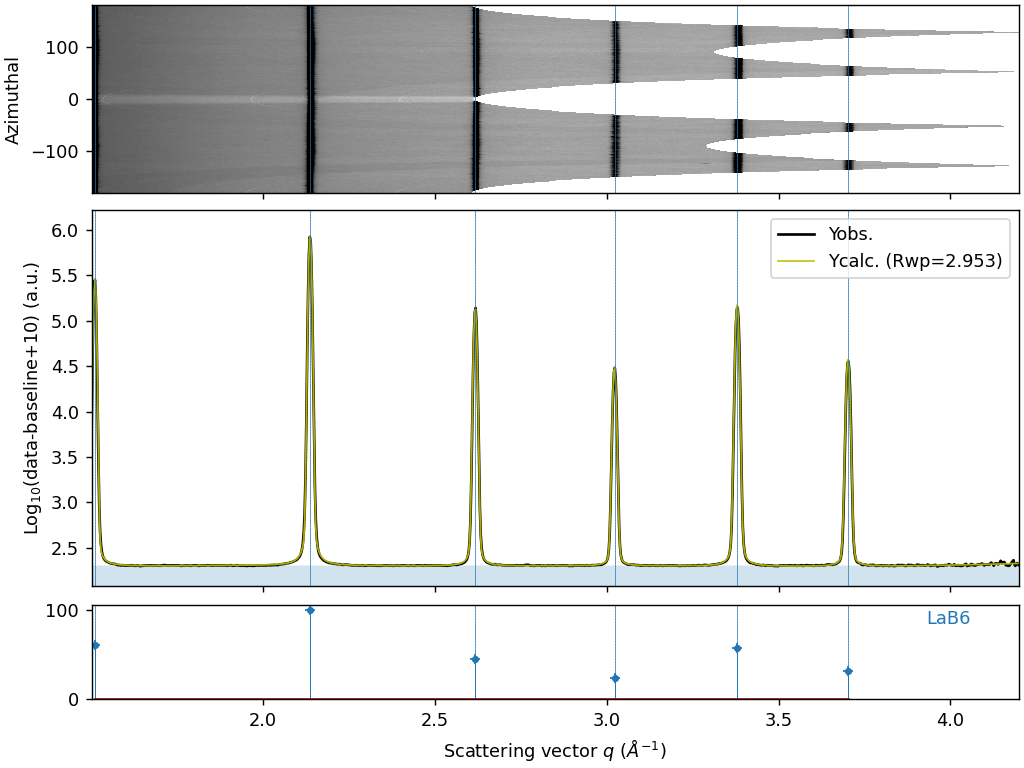

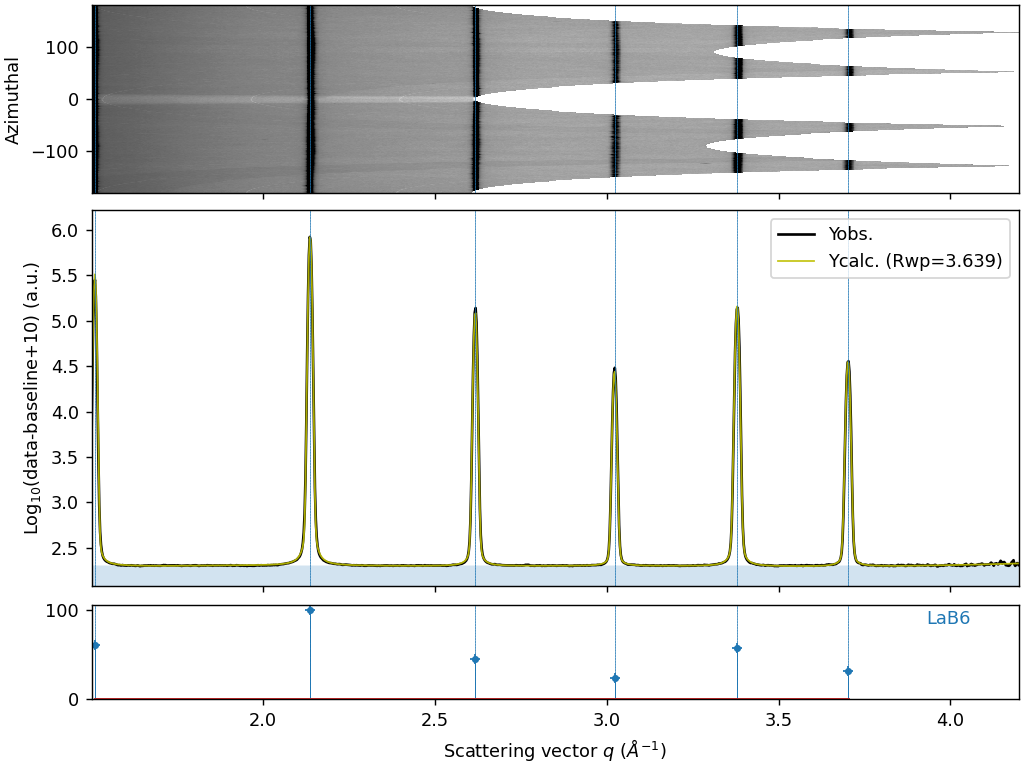

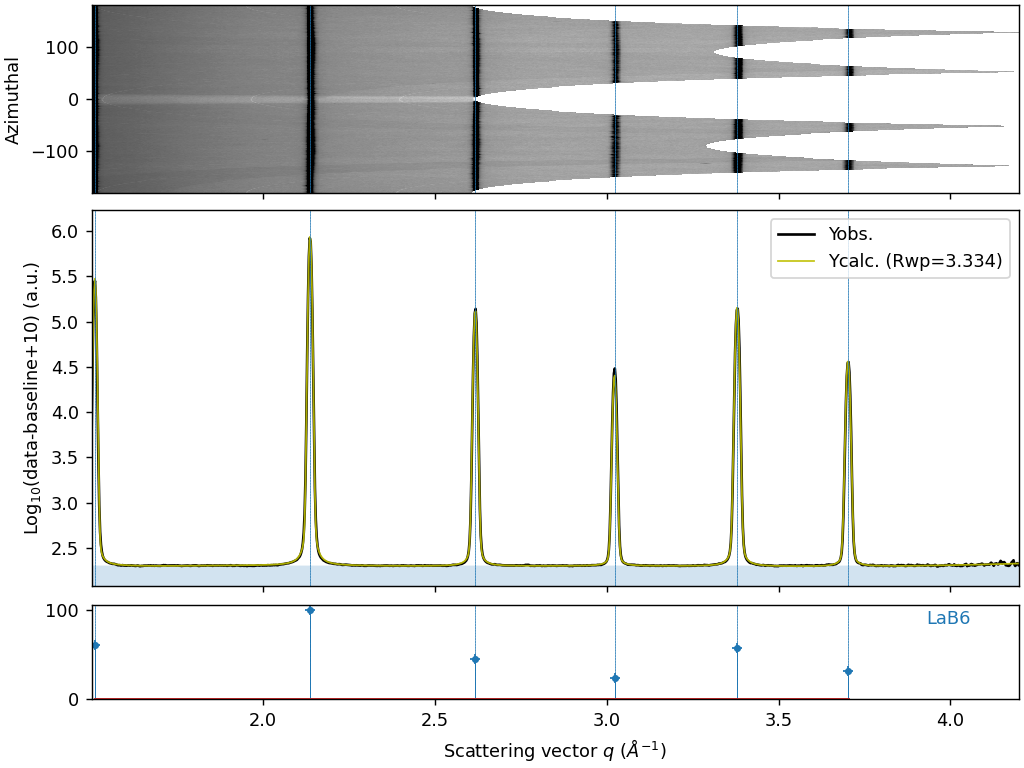

In [115]:
sample = sample_LaB6
sample.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=True,
                    roi_radial_range=[1.5,4.2],
                    plot=False)
sample.load_phases(phases=phases_LaB6,plot=False)


# INITIAL REFINEMENT
sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample.set_LeBail()
sample.refine_background(num_coeffs=10)
sample.refine_cell_params()
sample.refine_size_broadening()
sample.refine_strain_broadening()
sample.plot_refinement()

# SET TO RIETVELD
sample.set_LeBail(set_to=False,refine=True)
sample.plot_refinement()

# ADD TEXTURE
sample.gpx['Phases']['LaB6']['Histograms']['PWDR data.xy']['Pref.Ori.'] = ['SH', 1.0, True, [0, 0, 1], 4, {'C(4,1)': 0}, [''], 0.1]
sample.gpx.refine()
sample.gpx['Phases']['LaB6']['Histograms']['PWDR data.xy']['Pref.Ori.'][2] = False
sample.gpx.save()

sample.plot_refinement()

/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1225: UserWarning: Issues encountered while parsing CIF: Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))



Rwp from 1st refinement is = 31.372 
 
Background is refined. Rwp is now 26.353 (was 31.372)
Cell parameters of all phases are refined. Rwp is now 12.583 (was 26.353)
Size broadening of all phases are refined. Rwp is now 7.064 (was 12.583)
Strain broadening of all phases are refined. Rwp is now 7.054 (was 7.064)


/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/xarray/core/computation.py:825: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/xarray/core/computation.py:825: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


set_LeBail output:
Rwp is now 19.765 (was 7.054)
gpx file saved as /home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.gpx
 Hessian Levenberg-Marquardt SVD refinement on 2 variables:
initial chi^2 1221.5 with 1080 obs.
Cycle 0: 0.02s, Chi**2: 154.91 for 1080 obs., Lambda: 0,  Delta: 0.873, SVD=0
Cycle 1: 0.02s, Chi**2: 154.34 for 1080 obs., Lambda: 0,  Delta: 0.00371, SVD=0
Cycle 2: 0.02s, Chi**2: 154.34 for 1080 obs., Lambda: 0,  Delta: -1.33e-08, SVD=0
converged
Maximum shift/esd = 8.175 for all cycles
Read from file:/home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.bak13.gpx
Save to file  :/home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.gpx
GPX file save successful
 Refinement results are in file: /home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.lst
 ***** Refinement successful *****
gpx file saved as /home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.gpx


/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/xarray/core/computation.py:825: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


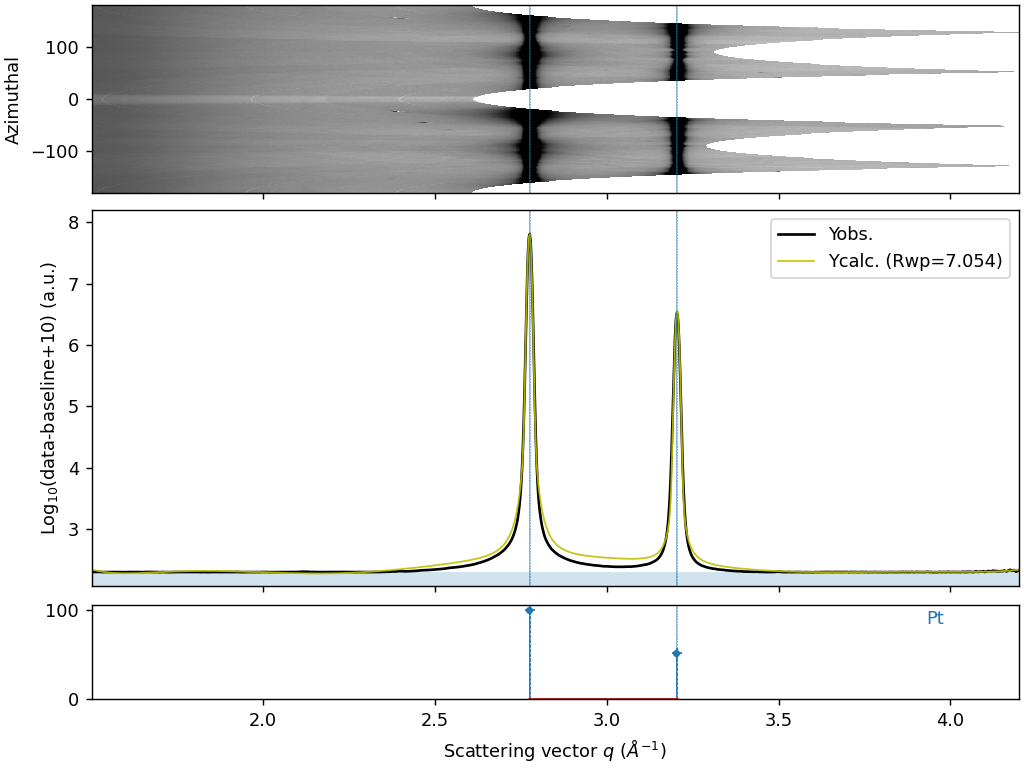

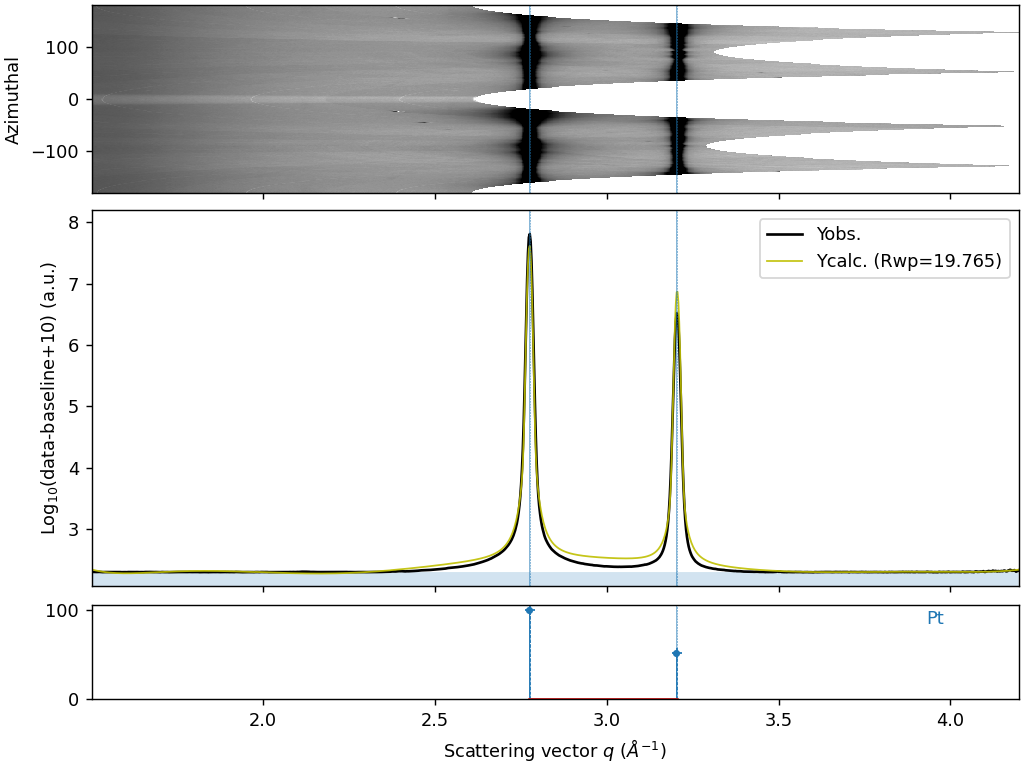

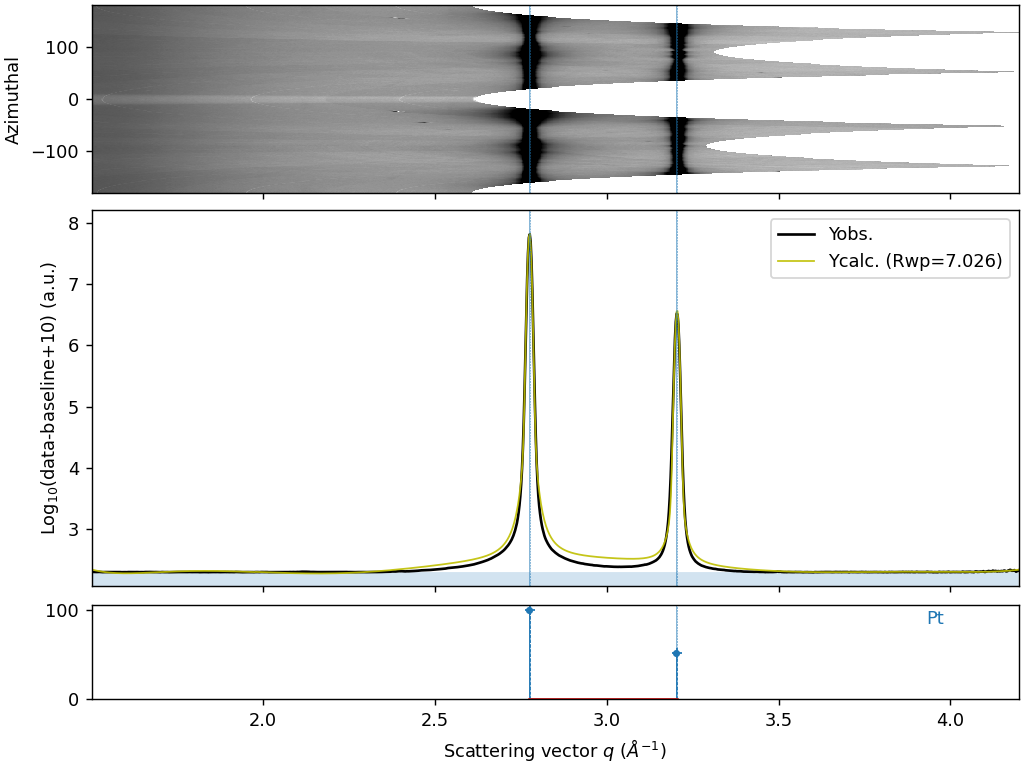

In [47]:
sample = sample_Pt
sample.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=True,
                    roi_radial_range=[1.5,4.2],
                    plot=False)
sample.load_phases(phases=phases_Pt,plot=False)


# INITIAL REFINEMENT
sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample.set_LeBail()
sample.refine_background(num_coeffs=10)
sample.refine_cell_params()
sample.refine_size_broadening()
sample.refine_strain_broadening()
sample.plot_refinement()

# SET TO RIETVELD
sample.set_LeBail(set_to=False,refine=True)
sample.plot_refinement()

# ADD TEXTURE
sample.gpx['Phases']['Pt']['Histograms']['PWDR data.xy']['Pref.Ori.'] = ['SH', 1.0, True, [0, 0, 1], 4, {'C(4,1)': 0}, [''], 0.1]
sample.gpx.refine()
sample.gpx['Phases']['Pt']['Histograms']['PWDR data.xy']['Pref.Ori.'][2] = False
sample.gpx.save()

sample.plot_refinement()

/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1225: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1225: UserWarning: Issues encountered while parsing CIF: Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))



Rwp from 1st refinement is = 64.930 
 
Cell parameters of all phases are refined. Rwp is now 36.121 (was 64.930)
Size broadening of all phases are refined. Rwp is now 11.919 (was 36.121)
Strain broadening of all phases are refined. Rwp is now 11.846 (was 11.919)


/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1225: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1225: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


set_LeBail output:
Rwp is now 64.204 (was 11.846)


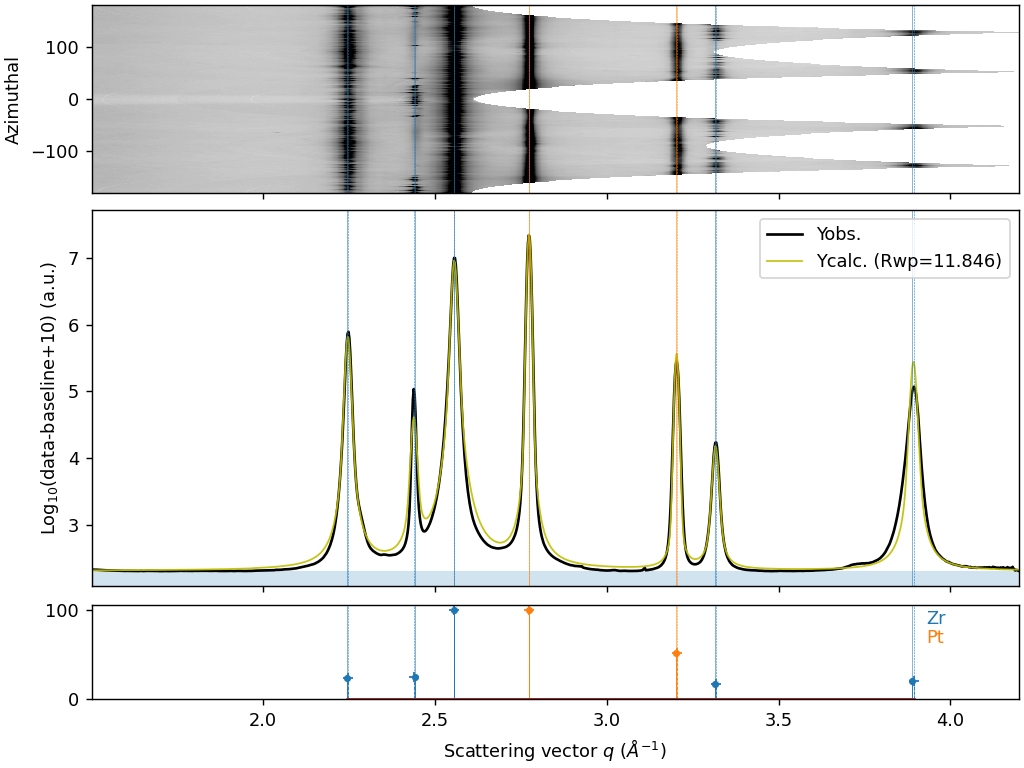

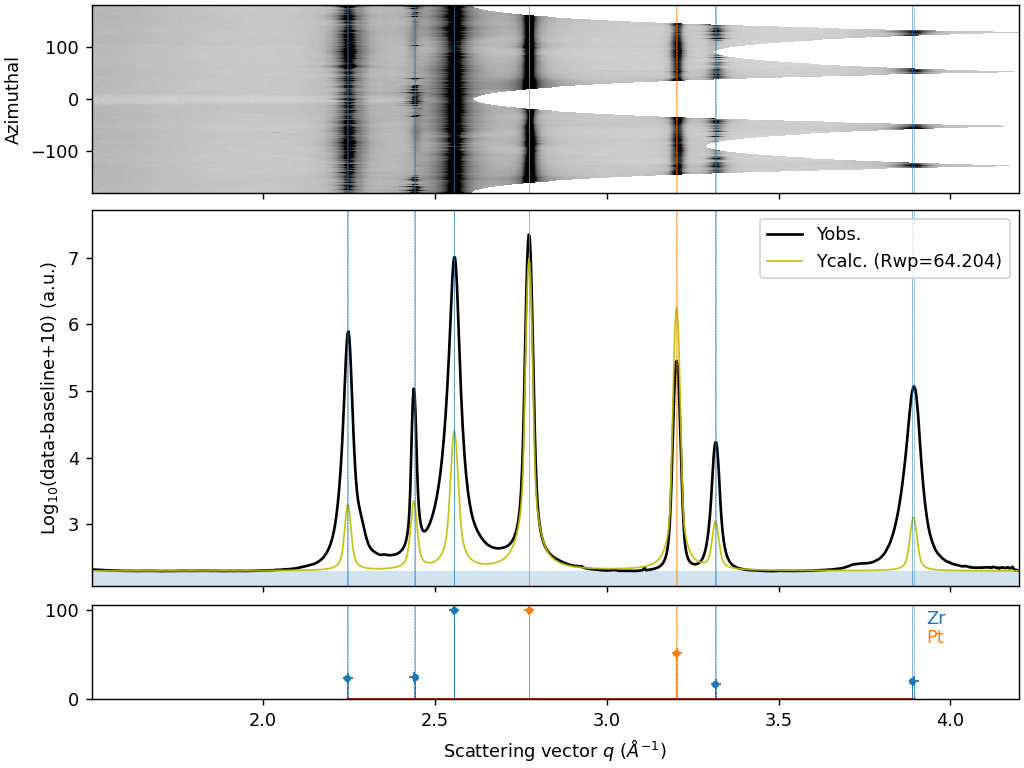

In [130]:
sample = sample_DAHL
sample.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=True,
                    roi_radial_range=[1.5,4.2],
                    plot=False)
sample.load_phases(phases=phases_PtZr,plot=False)


# INITIAL REFINEMENT
sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample.set_LeBail()
# sample.refine_background(num_coeffs=1)
sample.refine_cell_params()
sample.refine_size_broadening()
sample.refine_strain_broadening()
sample.plot_refinement()

# SET TO RIETVELD
sample.set_LeBail(set_to=False,refine=True)
sample.plot_refinement()


In [129]:

# # ADD TEXTURE
# sample.gpx['Phases']['Pt']['Histograms']['PWDR data.xy']['Pref.Ori.'] = ['SH', 1.0, True, [0, 0, 1], 4, {'C(4,1)': -0.48}, [''], 0.1]
# sample.gpx.refine()
# sample.gpx['Phases']['Pt']['Histograms']['PWDR data.xy']['Pref.Ori.'][2] = True
# sample.gpx.save()


# sample.gpx['Phases']['Zr']['Histograms']['PWDR data.xy']['Pref.Ori.'] = ['SH', 1.0, True, [0, 0, 1], 6, {'C(2,0)': 2.312,
#                                                                                                          'C(4,0)': 0.59,
#                                                                                                          'C(6,0)': -0.947,
#                                                                                                          'C(6,6)': -0.3490,
#                                                                                                          }, [''], 0.1]
# sample.gpx.refine()
# sample.gpx['Phases']['Zr']['Histograms']['PWDR data.xy']['Pref.Ori.'][2] = False
# sample.gpx.save()




# sample.plot_refinement()

In [110]:
import GSASIIscriptable as G2sc

In [113]:
gpx_edited = G2sc.G2Project(gpxfile='%s/gsas.gpx'%sample.gsasii_run_directory)
gpx_edited['Phases']['Zr']['Histograms']['PWDR data.xy']['Pref.Ori.']

['SH', 1.0, True, [0, 0, 1], 0, {}, [''], 0.1]